<a href="https://colab.research.google.com/github/NzambiGrace/ImageClassifierPro/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image classification using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


(50000, 32, 32, 3)

### Data Exploration

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
### Analyzing the y dataset
### Notoce taht it contains 50,000 samples and 1 dimensional array
y_train.shape

(50000, 1)

In [5]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

###  Notice that the above y_train is in 2-dimensional array , thus I reshape it to a 1 dimensional array

In [6]:
y_train =y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes[9]

'truck'

In [8]:
#### Defining plot_sample function for visualizing the images
def plot_sample(x, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

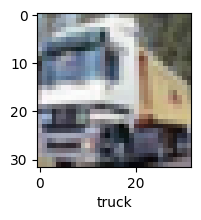

In [9]:
plot_sample(x_train, y_train, 1)

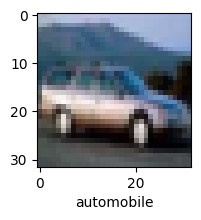

In [10]:
plot_sample(x_train, y_train, 4)

### Data Preprocessing

###### Normalization
We normalize the image data by 255 because a pixel value ranges from 0 to 255, thus dividing it by 255 we normalize to a 0 to 1 range.

In [11]:
x_train = x_train /255
x_test = x_test /255

### Modelling

##### ANN

In [12]:
cnn = models.Sequential([

    # cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

     # cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation= 'softmax'),

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.compile (optimizer = 'adam',
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3529 - loss: 1.7556
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5577 - loss: 1.2435
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6138 - loss: 1.1093
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6505 - loss: 1.0080
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6719 - loss: 0.9369
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6923 - loss: 0.8819
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7076 - loss: 0.8459
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7170 - loss: 0.8202
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7270 - loss: 0.7834
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7375 - loss: 0.7531


The CNN model gets an accuracy of 73 with the training data, this is pretty well as compared to the previous machine learning models and ANN

In [14]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6860 - loss: 0.9266


[0.9413884878158569, 0.6783999800682068]

On the test data the CNN model gets an accuracy of 67% which is good but can be improved.



---



In [15]:
# Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.80      0.79      0.80      1000
           2       0.61      0.56      0.58      1000
           3       0.53      0.44      0.48      1000
           4       0.69      0.52      0.59      1000
           5       0.52      0.68      0.59      1000
           6       0.80      0.71      0.75      1000
           7       0.68      0.74      0.70      1000
           8       0.77      0.83      0.80      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



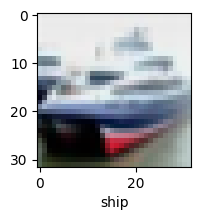

In [17]:
# Plotting of some samples
y_test = y_test.reshape(-1,)
plot_sample(x_test, y_test, 1)

In [20]:
y_pred_classes[:5]

[3, 8, 8, 0, 4]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)